In [19]:

# Libreria para el manejo de array
import numpy as np
# Libreria para el manejo de tablas o estructuras
import pandas as pd
# Liberia para graficos en 2D
import matplotlib.pyplot as plt
# Permite mostrar los graficos en el mismo notebook
%matplotlib inline

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [20]:
#Carga Inicial del Archivo
data = pd.read_csv('HTRU2_Features.csv', header = None, 
                   names = ['MeanIntegratedProfile',
                            'StdIntegratedProfile',
                            'ExcessKurtosisIntegratedProfile',
                            'SkewnessIntegratedProfile',
                            'ManDMSNRCurve',
                            'StdDMSNRCurve',
                            'ExcessKurtosisDMSNRCurve',
                            'SkewnessDMSNRCurve',
                            'Clase'])
data.head()

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,ManDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve,Clase
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [22]:
# Mostramos una tabla con la descripcion de los campos
data.drop(['Clase'], axis=1).describe()

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,ManDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [34]:
# Variables que seran utilizadas como X
columnaX = ['MeanIntegratedProfile',
                            'StdIntegratedProfile',
                            'ExcessKurtosisIntegratedProfile',
                            'SkewnessIntegratedProfile',
                            'ManDMSNRCurve',
                            'StdDMSNRCurve',
                            'ExcessKurtosisDMSNRCurve',
                            'SkewnessDMSNRCurve']
# Variable que sera utilizada como Y
columnaY = 'Clase'

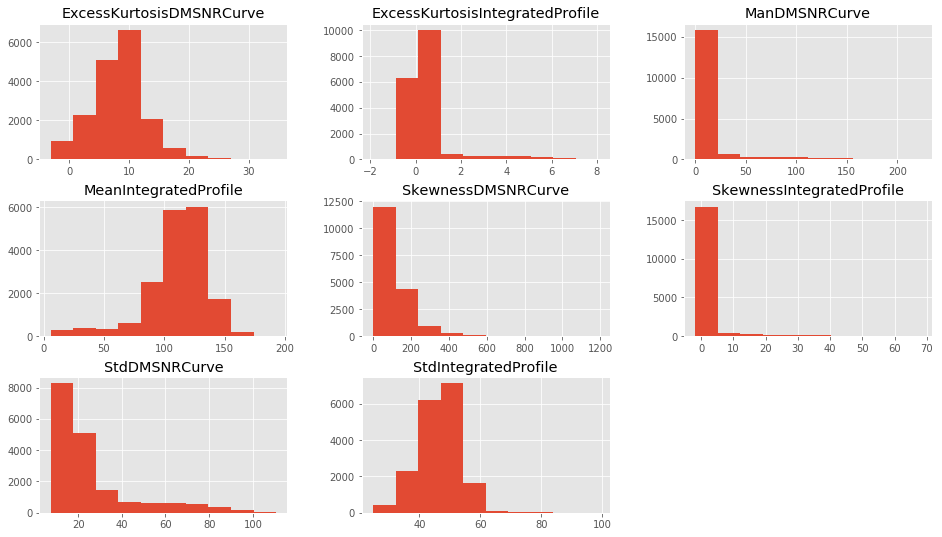

In [80]:
# Grafico histograma de las variables X
data[columnaX].hist()
plt.show()

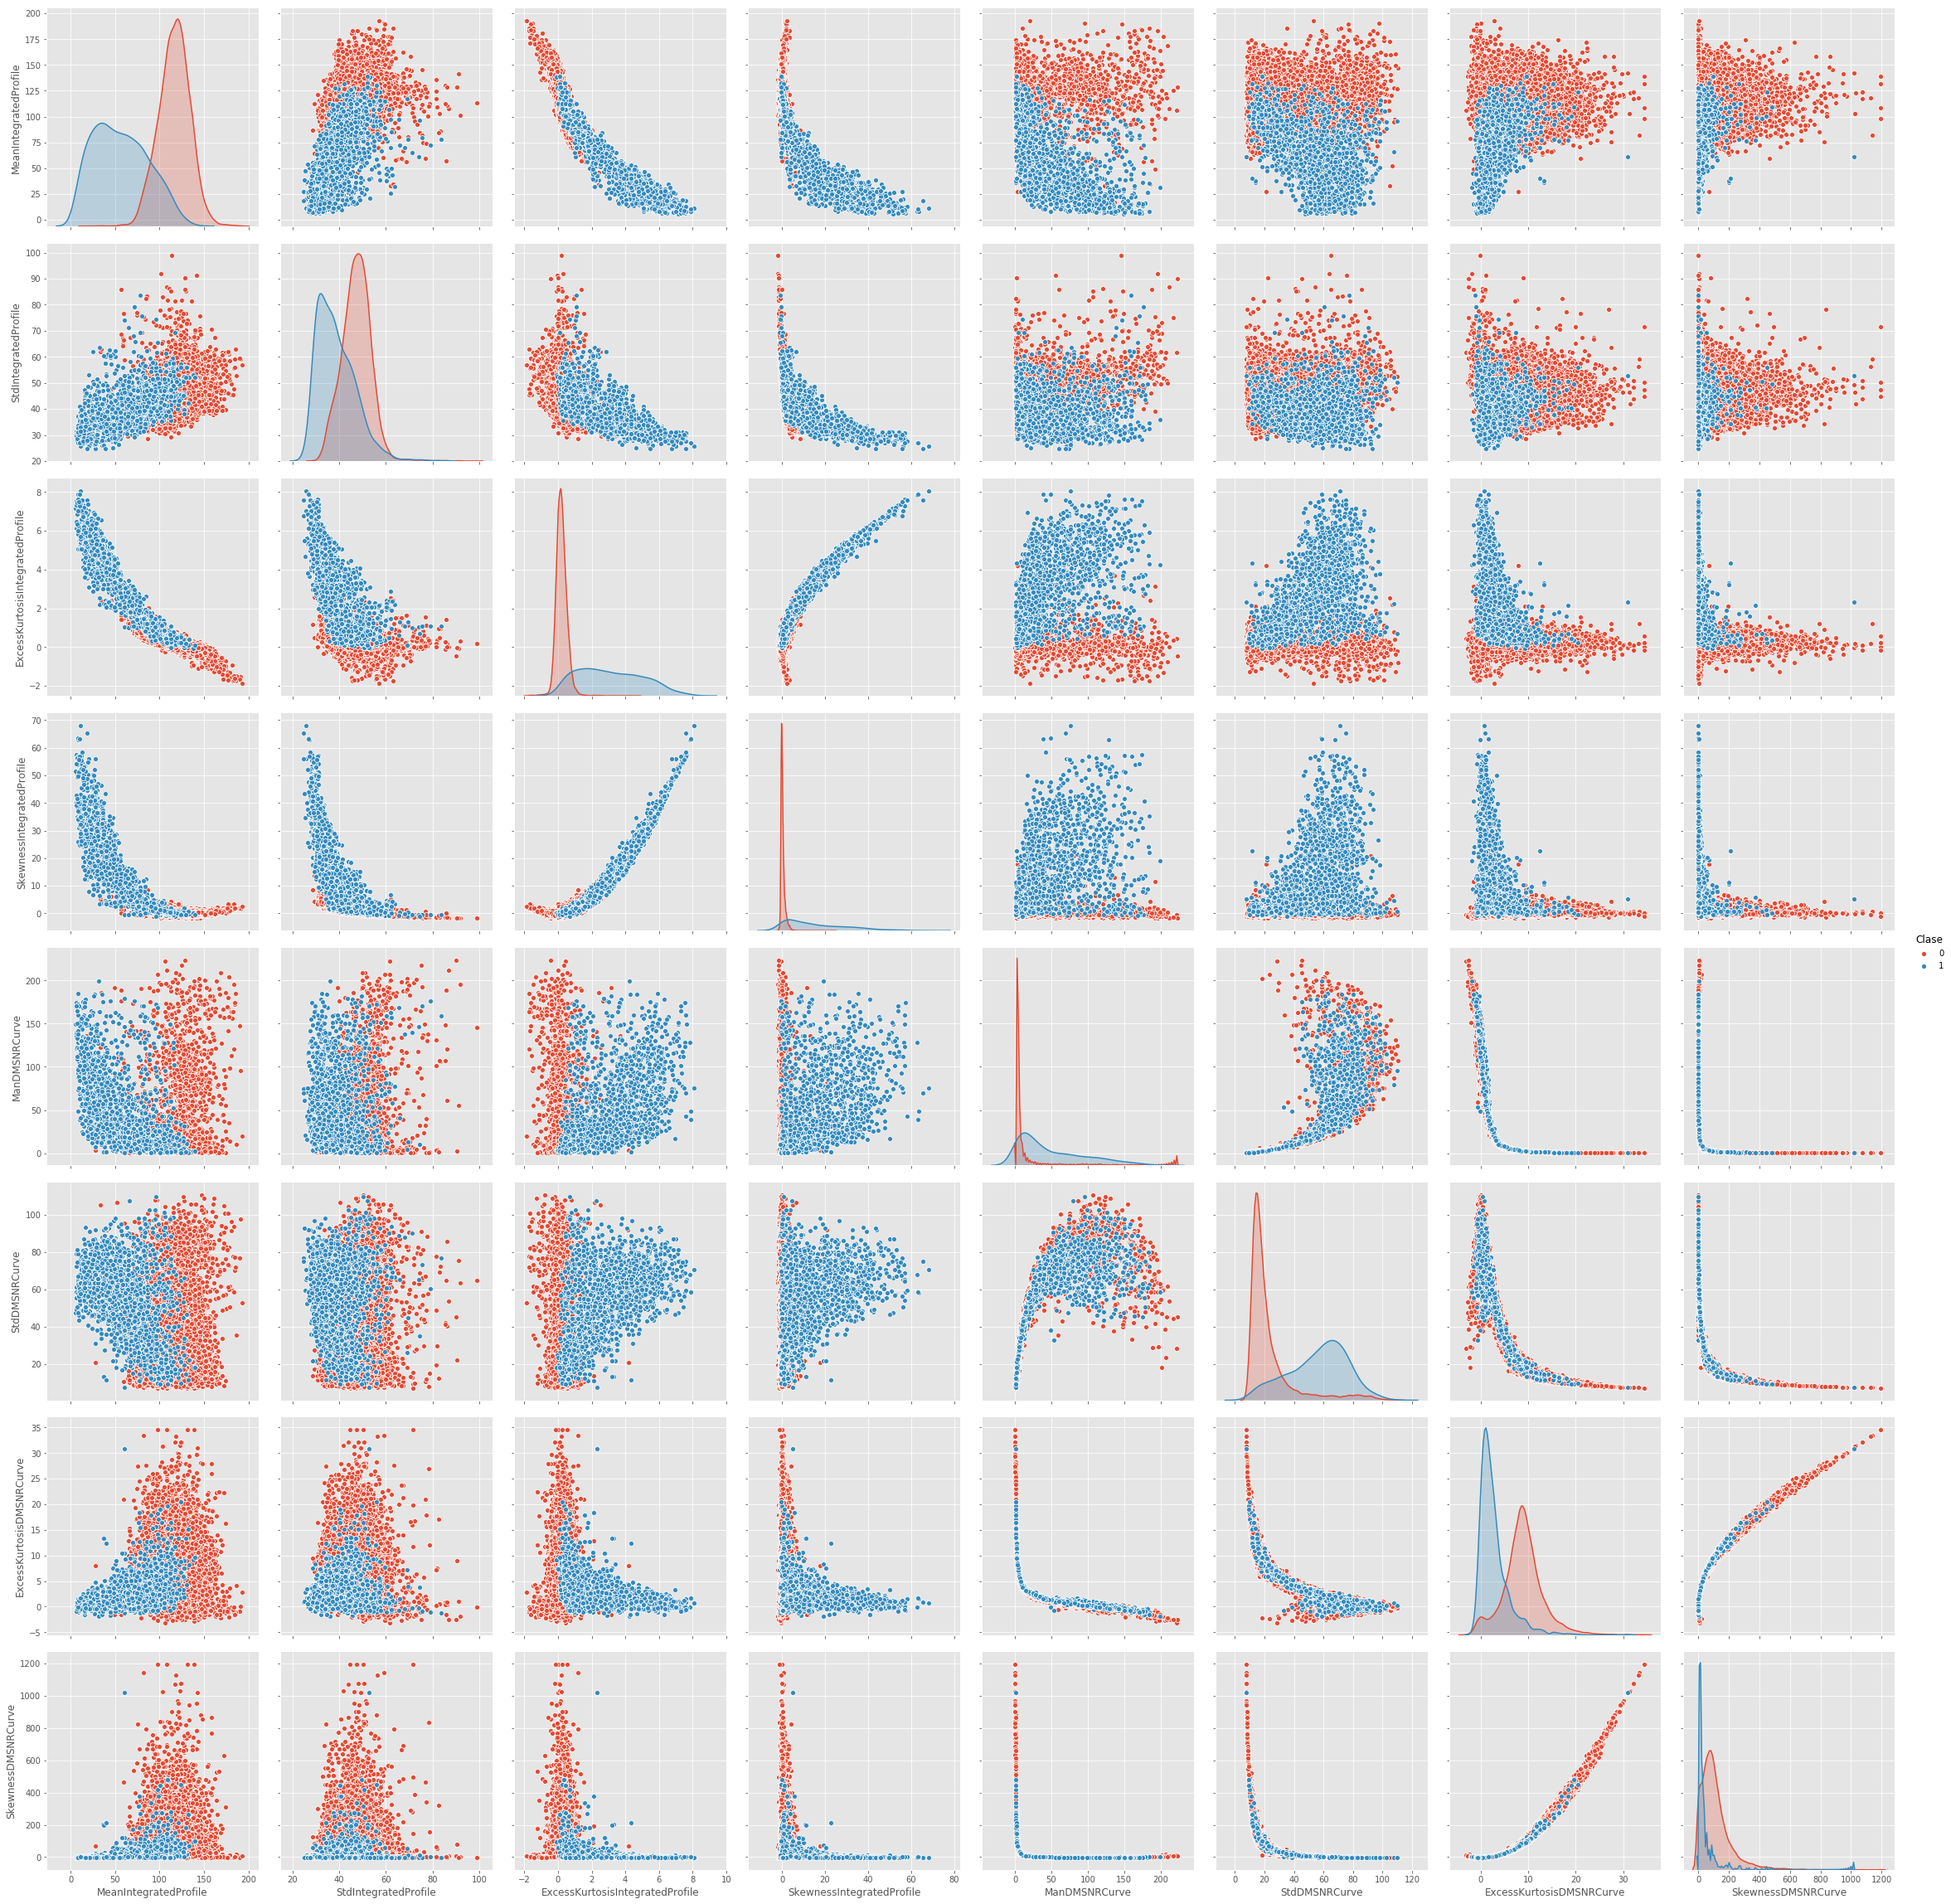

In [82]:
# Graficos de cada uno de los atributos con respecto a la clase base
sb.pairplot(data.dropna(), hue='Clase',height= 4,vars=['MeanIntegratedProfile',
                            'StdIntegratedProfile',
                            'ExcessKurtosisIntegratedProfile',
                            'SkewnessIntegratedProfile',
                            'ManDMSNRCurve',
                            'StdDMSNRCurve',
                            'ExcessKurtosisDMSNRCurve',
                            'SkewnessDMSNRCurve'],kind='scatter')

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,ManDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve
MeanIntegratedProfile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033
StdIntegratedProfile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691
ExcessKurtosisIntegratedProfile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491
SkewnessIntegratedProfile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782
ManDMSNRCurve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269
StdDMSNRCurve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800
ExcessKurtosisDMSNRCurve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743
SkewnessDMSNRCurve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000


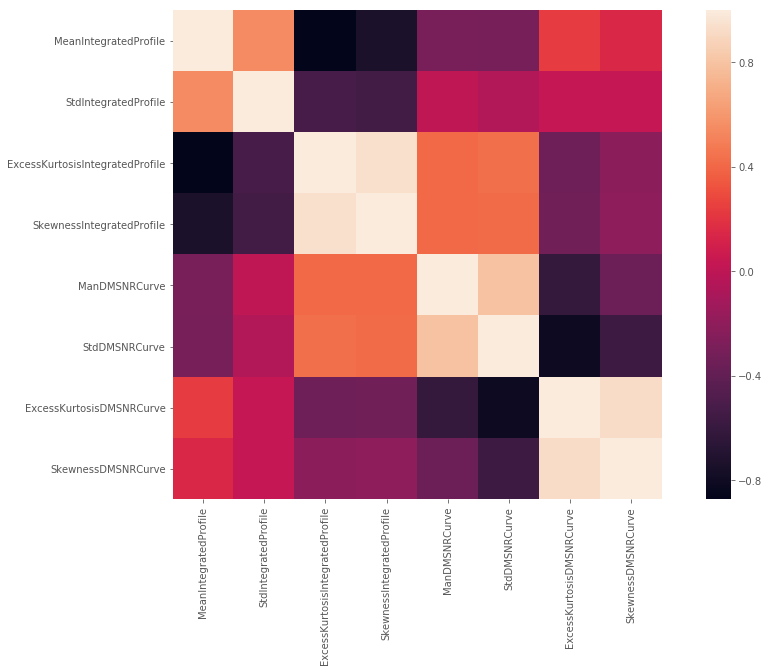

In [67]:
# Diagrama de correlacion de Pearson
cor = data.drop(['Clase'], axis=1).corr(method='pearson') # Calculamos la correcion de las variables
sb.heatmap(cor, square = True) #Show el grafico de colerracion
cor # imprimimos la tabla de correlacion

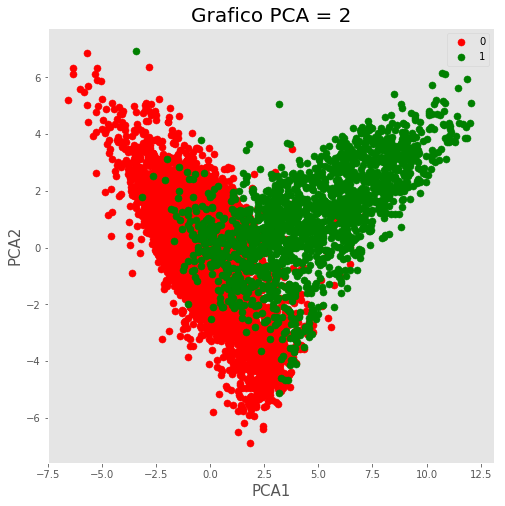

In [87]:
# Generando PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extraemos las X
X = np.array(data[columnaX])
# Extraemos Y
y = np.array(data[columnaY])
#X.shape
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

finalDf = pd.concat([principalDf, data[['Clase']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('Grafico PCA = 2', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Clase'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#print pca.explained_variance_ratio_

In [88]:
# Separamos las variables X e Y
#columnaY
#X = np.array(data[columnaX])
#y = np.array(data[columnaY])
#X.shape

In [58]:
# Calculamos el valor de K

#Nc = range(1, 20)
#kmeans = [KMeans(n_clusters=i) for i in Nc]
#kmeans
#score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
#plt.plot(Nc,score)
#plt.xlabel('Numero de Clusteres')
#plt.ylabel('Score')
#plt.title('Curva Codo del Cluster')
#plt.show()


In [59]:
# Ejecutamos el clusters
#kmeans = KMeans(n_clusters=3).fit(X)
#centroids = kmeans.cluster_centers_
#print(centroids)


In [60]:
# Creando los clusteres
#labels = kmeans.predict(X)
# recuperando los centros de cada cluster
#C = kmeans.cluster_centers_
#colores=['red','green','yellow']
#asignar=[]
#for row in labels:
#    asignar.append(colores[row])

#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)